# Load Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

# Load Data

In [3]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\datasets\people_personality_dataset.csv")

df = pd.read_csv(file_path)
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


# Basic Understanding of data

In [10]:
print(f"Rows >> {df.shape[0]} \n")

print(f"Columns >> {df.shape[1]} \n")

print(f"Columns >> {df.columns} \n")

print(f"Null values >> {df.isna().sum()} \n")

print(f"information >> {df.info()} \n")

print(f"Unique values >> {df.nunique()} \n")

print(f"duplicate values >> {df.duplicated().sum()} \n")

Rows >> 42716 

Columns >> 9 

Columns >> Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object') 

Null values >> Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 42716 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 42716 non-null  float64
 1   Gender              42716 non-null  object 
 2   Education           42716 non-null  int64  
 3   Introversion Score  42716 non-null  float64
 4   Sensing Score       42716 non-null  float64
 5   Thinking Score      42716 non-null  float64
 6   Judging Score       42716 non-null  float6

## Drop duplicates if any

In [7]:
df.drop_duplicates(inplace=True)

## convert col names to lower case

In [13]:
df.columns = df.columns.str.lower()

In [37]:
df.columns = df.columns.str.replace(' ','_')

In [14]:
df

,age,gender,education,introversion score,sensing score,thinking score,judging score,interest,personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
...,...,...,...,...,...,...,...,...,...
43738,37.0,Female,0,4.15540,6.318498,2.76299,5.458352,Arts,ESFP
43739,26.0,Male,1,8.88656,5.118399,8.48784,5.331942,Arts,ENTP
43740,29.0,Male,0,2.71470,6.851956,0.25519,3.623678,Unknown,ISFP
43742,23.0,Male,0,7.23553,4.876780,2.41671,4.654016,Arts,ENFP


## Datatype casting

In [24]:
for col in ['gender','education','interest','personality']:
    df[col] = df[col].astype('category')

# Basic data quality checks for numerical cols

In [40]:
df[df['age'] < 18]

df[df['age'] > 100]

df[(df['introversion_score'] > 10) | (df['sensing_score'] > 10) | (df['sensing_score'] > 10) | (df['sensing_score'] > 10)]

df[(df['introversion_score'] < 0) | (df['sensing_score'] < 0) | (df['sensing_score'] < 0) | (df['sensing_score'] < 0)]

,age,gender,education,introversion_score,sensing_score,thinking_score,judging_score,interest,personality


# Distribution of Numerical cols

In [43]:
numerical_cols = df.select_dtypes(include='number').columns

In [44]:
numerical_cols

Index(['age', 'introversion_score', 'sensing_score', 'thinking_score',
       'judging_score'],
      dtype='object')

In [95]:
categorical_cols = df.select_dtypes(include='category').columns

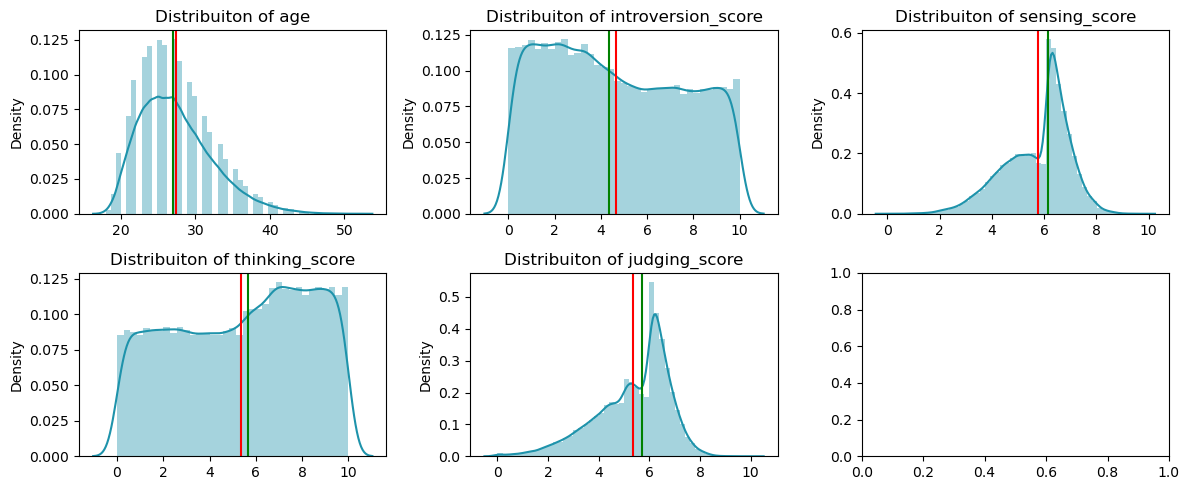

In [183]:
nrows = 2
ncols = len(numerical_cols)

fig, axes = plt.subplots(nrows, math.ceil(ncols/3)+1, figsize=(12,5))
axes = axes.flatten()

for ax, cols in zip(axes, numerical_cols):
    sns.distplot(x=df[cols], ax=ax, color = '#1e93ab')
    ax.axvline(df[cols].mean(), color = 'red')
    ax.axvline(df[cols].median(), color = 'green')
    ax.set_title(f"Distribuiton of {cols}")

plt.tight_layout()
plt.show()

# Frequency distribution of numerical cols

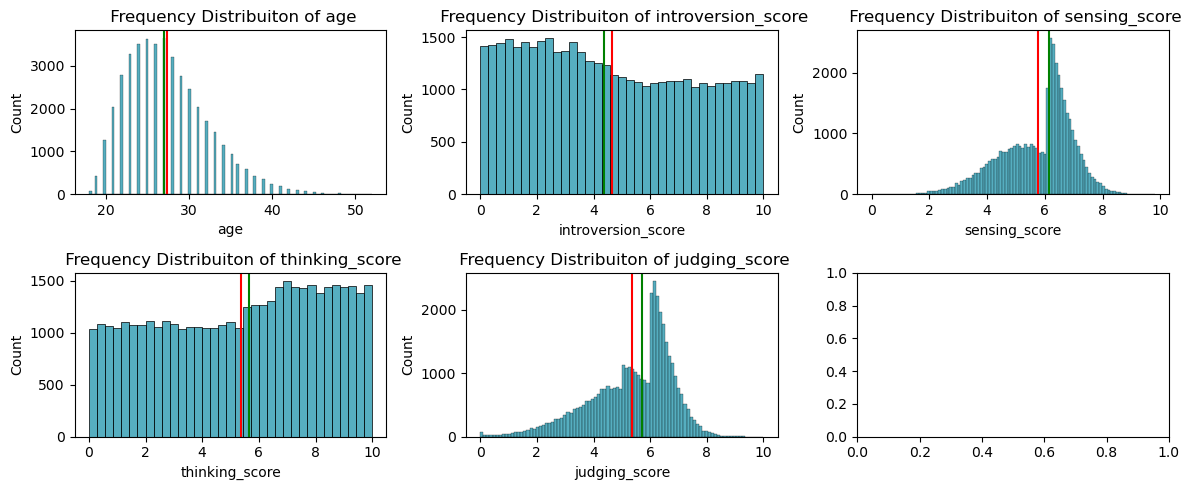

In [184]:
nrows = 2
ncols = len(numerical_cols)

fig, axes = plt.subplots(nrows, math.ceil(ncols/3)+1, figsize=(12,5))
axes = axes.flatten()

for ax, cols in zip(axes, numerical_cols):
    sns.histplot(x=df[cols], ax=ax, color = '#1e93ab')
    ax.axvline(df[cols].mean(), color = 'red')
    ax.axvline(df[cols].median(), color = 'green')
    ax.set_title(f" Frequency Distribuiton of {cols}")

plt.tight_layout()
plt.show()

# Distribution of categorical cols

In [28]:
for col in ['gender','education','interest','personality']:
    categorical_value_counts = df[col].value_counts()
    print(categorical_value_counts)
    print('='*60)

gender
Male      23598
Female    19118
Name: count, dtype: int64
education
0    32701
1    10015
Name: count, dtype: int64
interest
Unknown       15087
Arts           8249
Sports         6774
Others         6654
Technology     5952
Name: count, dtype: int64
personality
ENFJ    2734
ENFP    2734
ENTJ    2734
ENTP    2734
ESFJ    2734
ESFP    2734
ESTJ    2734
ESTP    2734
INFJ    2734
INFP    2734
INTJ    2734
INTP    2734
ISFJ    2734
ISFP    2734
ISTP    2734
ISTJ    1706
Name: count, dtype: int64


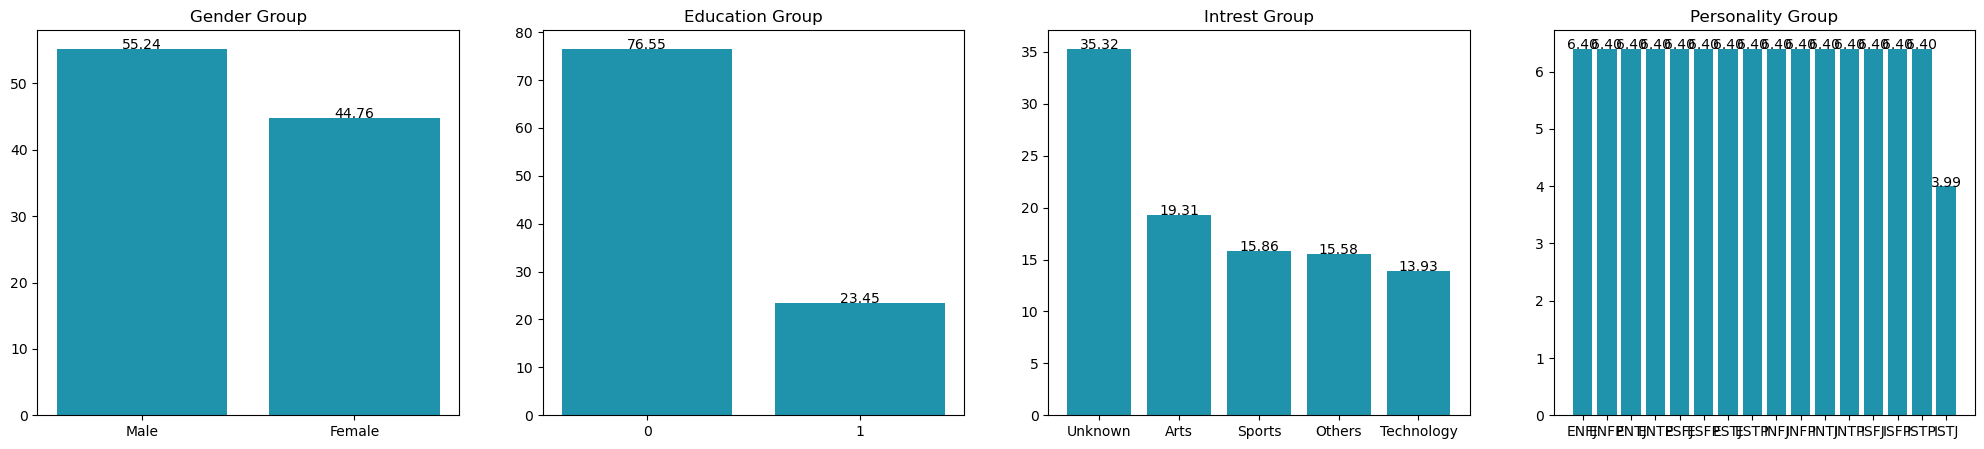

In [186]:
plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
gender_group = df['gender'].value_counts(normalize=True)*100
plt.bar(x=gender_group.index, height=gender_group.values, color = '#1e93ab')
plt.title('Gender Group')
for i, v in enumerate(gender_group.values):
    plt.text(i,v,f"{v:.2f}", ha='center')

plt.subplot(1,4,2)
education_group = df['education'].value_counts(normalize=True)*100
plt.bar(x=education_group.index, height=education_group.values, color = '#1e93ab')
plt.title('Education Group')
for i, v in enumerate(education_group.values):
    plt.text(i,v,f"{v:.2f}", ha='center')

plt.subplot(1,4,3)
interest_group = df['interest'].value_counts(normalize=True)*100
plt.bar(x=interest_group.index, height=interest_group.values, color = '#1e93ab')
plt.title('Intrest Group')
for i, v in enumerate(interest_group.values):
    plt.text(i,v,f"{v:.2f}", ha='center')

plt.subplot(1,4,4)
personality_group = df['personality'].value_counts(normalize=True)*100
plt.bar(x=personality_group.index, height=personality_group.values, color = '#1e93ab')
plt.title('Personality Group')
for i, v in enumerate(personality_group.values):
    plt.text(i,v,f"{v:.2f}", ha='center')


plt.show()

In [ ]:
observations:
-- Gender >> The dataset has a higher proportion of male compared to female, indicating class imbalance
-- Education >> A majority of individuals fall under the uneducated/undergraduate category, with fewer people in higher education levels.
-- Intreset >> Most participants have their interests marked as “unknown”, which may suggest missing or non-informative data.
-- personality >> A large share of the population is classified into the same personality type.

## Categorical to Numerical Analysis

In [96]:
categorical_cols

Index(['gender', 'education', 'interest', 'personality'], dtype='object')

In [97]:
numerical_cols

Index(['age', 'introversion_score', 'sensing_score', 'thinking_score',
       'judging_score'],
      dtype='object')

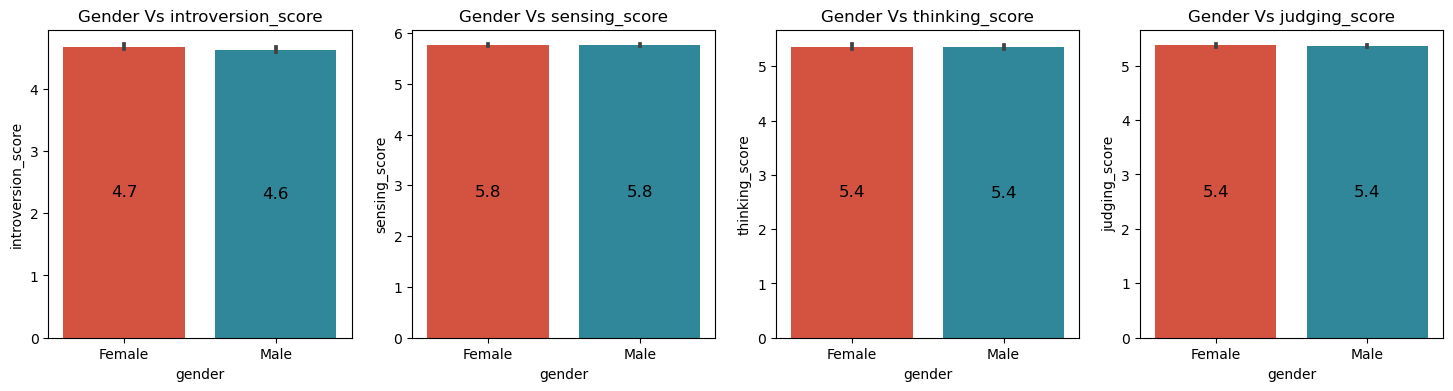

In [192]:
nrows = 1
ncols = ['introversion_score', 'sensing_score', 'thinking_score','judging_score']

fig, axes = plt.subplots(nrows, len(ncols), figsize=(18,4))
axes = axes.flatten()

for ax, cols in zip(axes,ncols):
    colors =['#ed3f27','#1e93ab']
    ax = sns.barplot(data=df, x='gender', y=cols, ax=ax, palette=colors)
    ax.set_title(f"Gender Vs {cols}")
        
    for c in ax.containers:
        plt.bar_label(c, fmt='%.1f', label_type="center", fontsize=12)
        
plt.tight_layout()
plt.show()


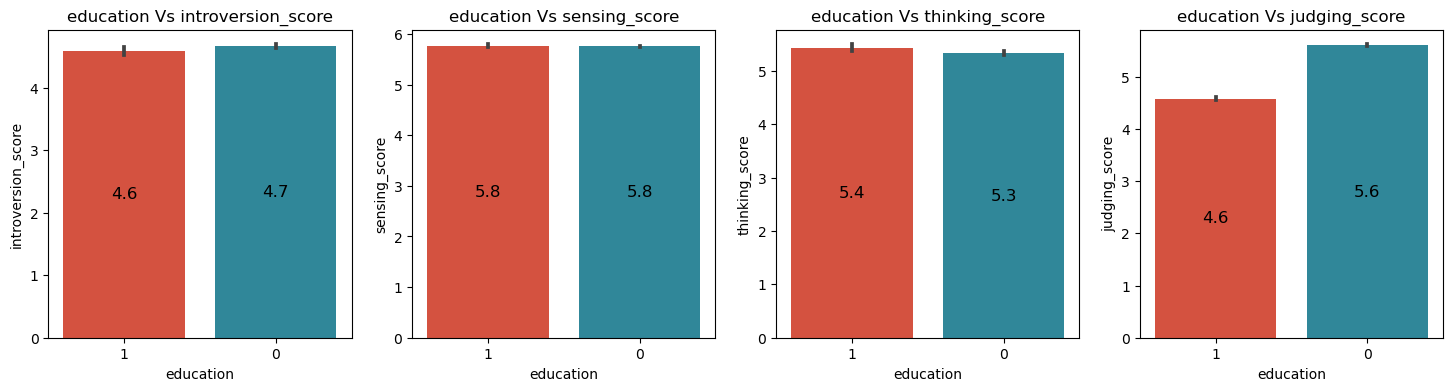

In [193]:
nrows = 1
ncols = ['introversion_score', 'sensing_score', 'thinking_score','judging_score']

fig, axes = plt.subplots(nrows, len(ncols), figsize=(18,4))
axes = axes.flatten()

for ax, cols in zip(axes,ncols):
    colors =['#ed3f27','#1e93ab']
    ax = sns.barplot(data=df, x='education', y=cols, ax=ax, palette=colors)
    ax.set_title(f"education Vs {cols}")
        
    for c in ax.containers:
        plt.bar_label(c, fmt='%.1f', label_type="center", fontsize=12)
        
plt.tight_layout()
plt.show()

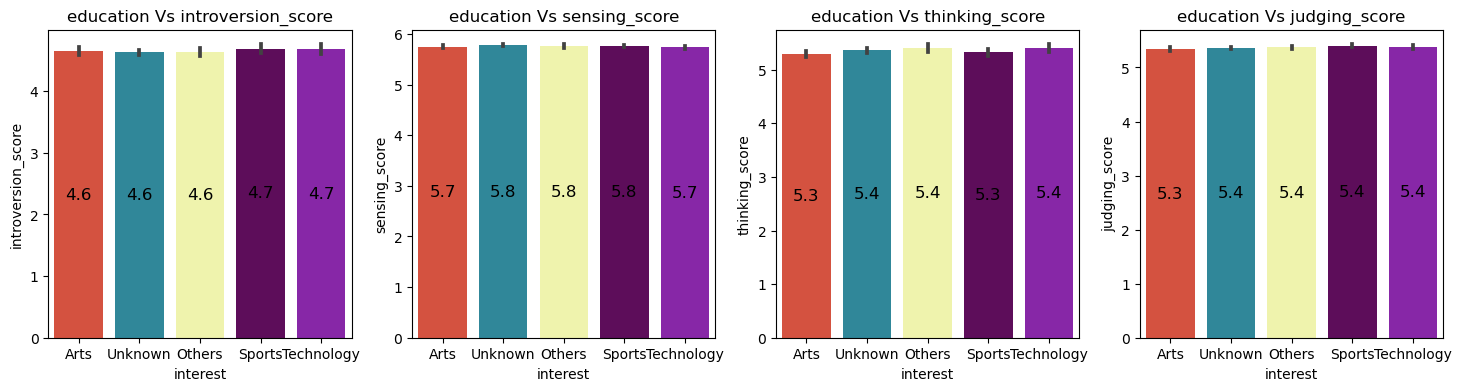

In [194]:
nrows = 1
ncols = ['introversion_score', 'sensing_score', 'thinking_score','judging_score']

fig, axes = plt.subplots(nrows, len(ncols), figsize=(18,4))
axes = axes.flatten()

for ax, cols in zip(axes,ncols):
    colors =['#ed3f27','#1e93ab','#faffa1','#6a0066','#9112bc']
    ax = sns.barplot(data=df, x='interest', y=cols, ax=ax, palette=colors)
    ax.set_title(f"education Vs {cols}")
        
    for c in ax.containers:
        plt.bar_label(c, fmt='%.1f', label_type="center", fontsize=12)
        
plt.tight_layout()
plt.show()

In [124]:
df['age'] = df['age'].astype('int')

In [126]:
df['age'].min(), df['age'].max() 

(18, 52)

In [128]:
df['age_group'] = pd.cut(x=df['age'], bins=[18,28,38,48,58], labels=['18-28','28-38','38-48','48-58'])

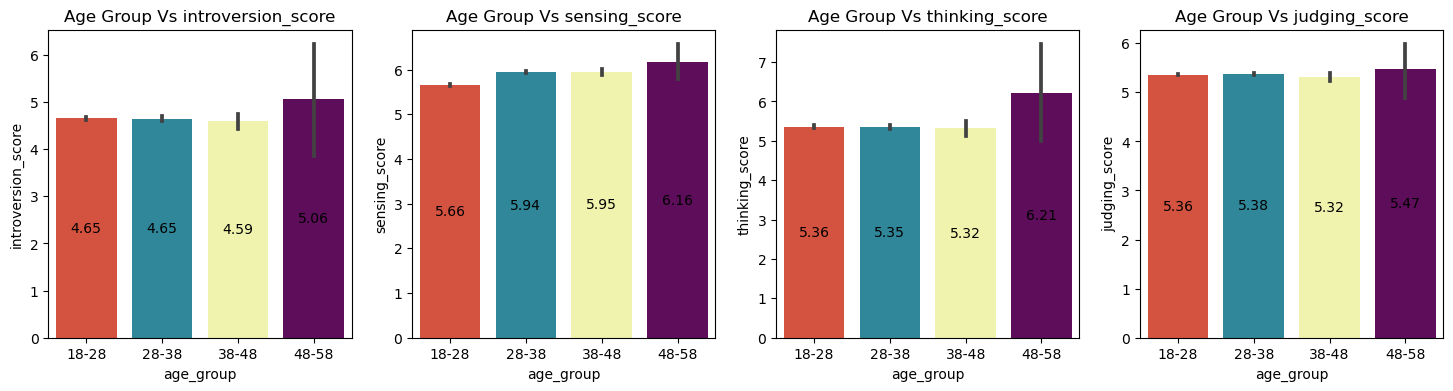

In [195]:
nrows = 1
ncols = ['introversion_score', 'sensing_score', 'thinking_score','judging_score']

fig, axes = plt.subplots(nrows, len(ncols), figsize=(18,4))
axes = axes.flatten()

for ax, cols in zip(axes,ncols):
    colors =['#ed3f27','#1e93ab','#faffa1','#6a0066']
    sns.barplot(data=df, x='age_group', y=cols, ax=ax, palette=colors)
    ax.set_title(f"Age Group Vs {cols}")
    for c in ax.containers:
        plt.bar_label(c,fmt= '%.2f', label_type = 'center')

plt.tight_layout()
plt.show()

## Correlation Matrix

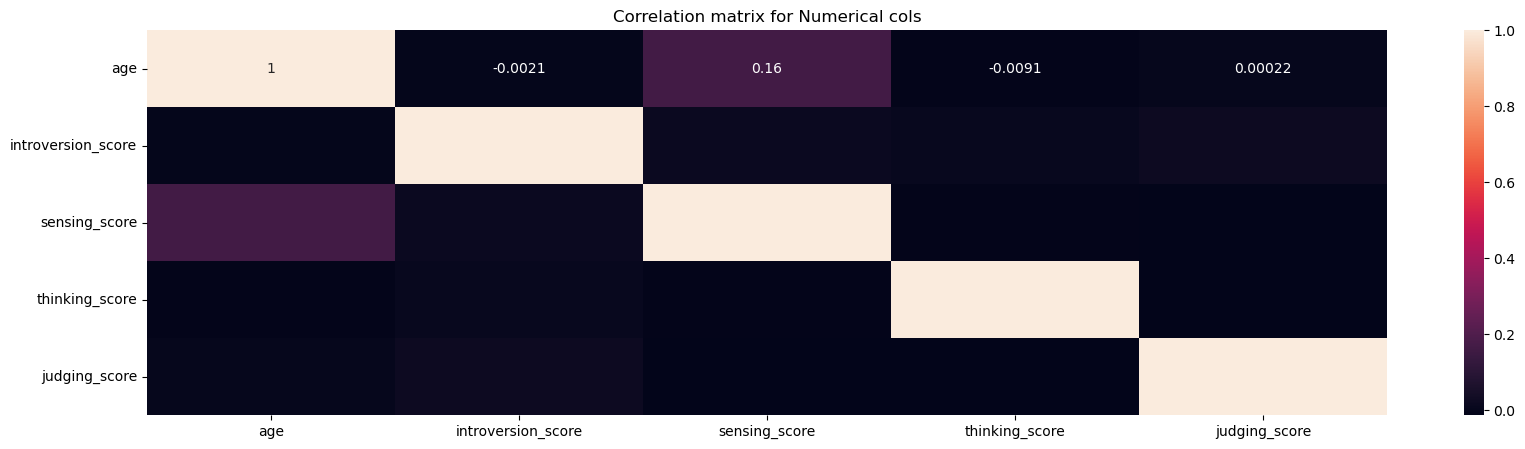

In [202]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20,5))
colors =['#ed3f27','#1e93ab','#faffa1','#6a0066','#9112bc']
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numerical cols")
plt.show()

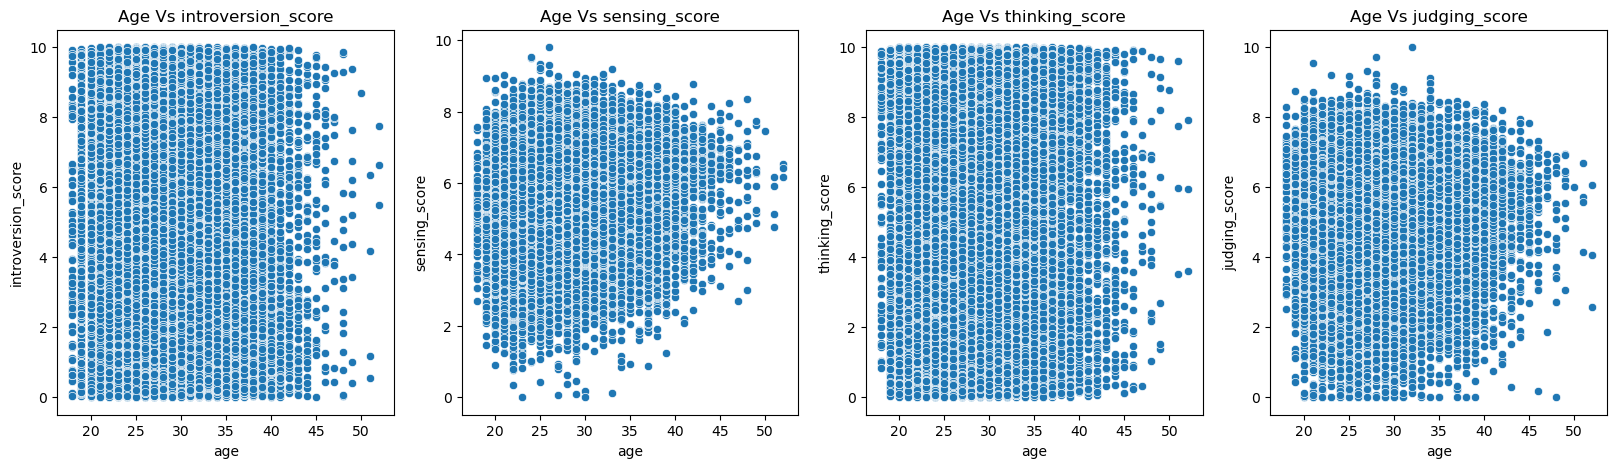

In [203]:
nrows = 1
ncols = ['introversion_score', 'sensing_score', 'thinking_score','judging_score']

fig, axes = plt.subplots(nrows, len(ncols), figsize=(20,5))
axes = axes.flatten()

for ax, cols in zip(axes, ncols):
    colors = ['#134686']
    sns.scatterplot(data= df, x='age', y=cols, ax=ax, palette=colors)
    ax.set_title(f"Age Vs {cols}")
    
plt.show()

# categorical Vs categorical Analysis

In [149]:
categorical_cols

Index(['gender', 'education', 'interest', 'personality'], dtype='object')

In [154]:
gender_to_education

education,0,1
gender,,
Female,14694,4424
Male,18007,5591


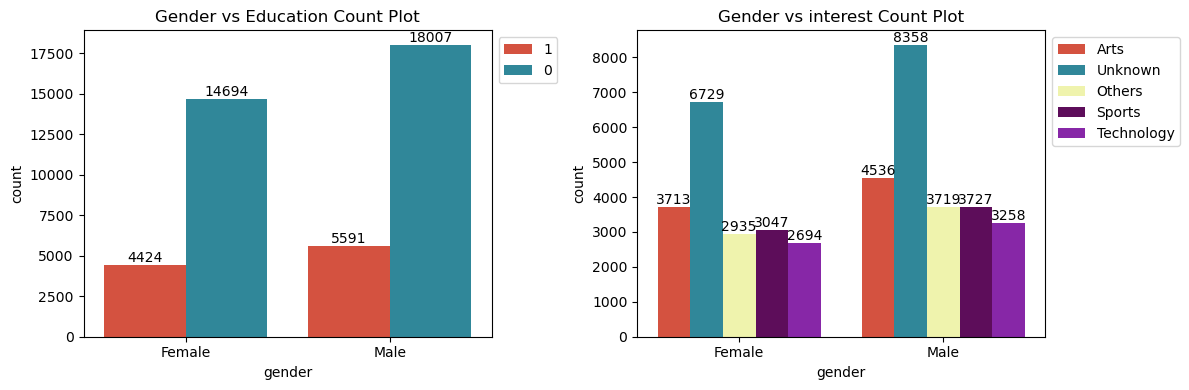

In [198]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
df['gender'] = df['gender'].astype(str)
df['education'] = df['education'].astype(str)
colors =['#ed3f27','#1e93ab']
ax= sns.countplot(data=df, x="gender", hue="education", palette=colors)
for c in ax.containers:
    ax.bar_label(c)
plt.title("Gender vs Education Count Plot")
plt.legend(bbox_to_anchor = (1,1))

plt.subplot(1,2,2)
df['gender'] = df['gender'].astype(str)
df['interest'] = df['interest'].astype(str)
colors =['#ed3f27','#1e93ab','#faffa1','#6a0066','#9112bc']
ax= sns.countplot(data=df, x="gender", hue="interest", palette=colors)
for c in ax.containers:
    ax.bar_label(c)
plt.title("Gender vs interest Count Plot")
plt.legend(bbox_to_anchor = (1,1))

plt.tight_layout()
plt.show()

In [ ]:
observations:
-- we have more no.of males with no education compared with female. 
-- one similar lines educated males > educated females

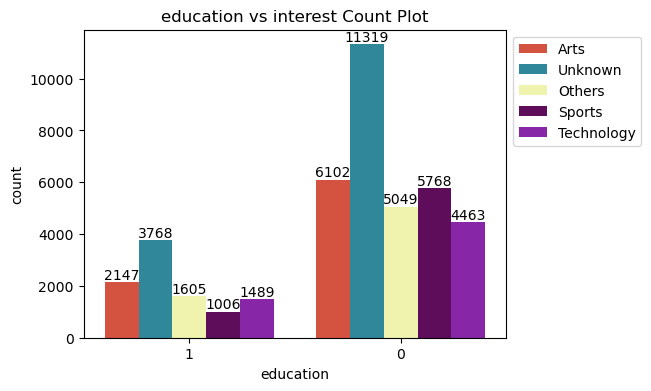

In [199]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
df['education'] = df['education'].astype(str)
df['interest'] = df['interest'].astype(str)
colors =['#ed3f27','#1e93ab','#faffa1','#6a0066','#9112bc']
ax= sns.countplot(data=df, x="education", hue="interest", palette=colors)
for c in ax.containers:
    ax.bar_label(c)
plt.title("education vs interest Count Plot")
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
observations:
--  Education vs Interest: There is a significant difference between educated and non-educated groups across interests.
    Non-educated individuals are concentrated in fewer interest categories (or even missing in some groups), whereas educated individuals are spread across multiple interest groups.